# Deep Q-Network: Banana Problem

---

This notebook shows how to solve the Banana Problem using a Deep Q-Network. 

### 1. Load environment

This notebook uses a Udacity workspace. If you're working from your local machine, be sure to install the `drlnd` python environment and Unity Banana environment as discussed in the readme! 

In [ ]:
!pip -q install ../../python

In [14]:
import numpy as np
import torch
from unityagents import UnityEnvironment

In [26]:
import dqn_agent

In [20]:
import deepqnetwork as dq

### 2. Setup Problem

In [12]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent

Set constant parameters.

In [16]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Build agent.

In [27]:
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)
action_size = brain.vector_action_space_size
agent = dqn_agent.Agent(state_size, action_size, 0)

NameError: name 'random' is not defined

Train.

In [ ]:
scores = dq.dqn(env, agent)

Close the environment.

In [6]:
env.close()

### 4. Plot Results

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

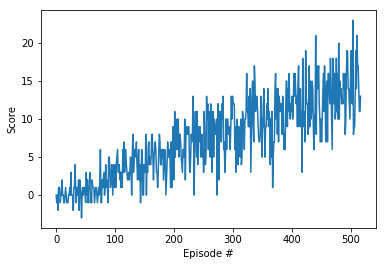

In [20]:
# plot the scores
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt